---
## Random Forest

Data set: http://archive.ics.uce.edu/ml/datasets/Wine+Quality



In [1]:
import pandas as pd

#import the dataset
DataSet = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
DataSet.to_csv('DataSet.csv')
print(DataSet.columns)
                              

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


### Select Data Set Metrics and Classifier
Create variables for metrics and classifier so we can use this on different data sets

In [2]:
my_metrics = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
my_classifier = 'quality'

### Split the data into training and test portions

In [3]:
from sklearn.model_selection import train_test_split


X = DataSet[my_metrics]
y = DataSet[my_classifier]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4) #training set size = 1-test_size

In [4]:
#show metrics

X_train.head() #first 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
142,5.2,0.34,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.0
157,7.1,0.43,0.42,5.50,0.071,28.0,128.0,0.99730,3.42,0.71,10.5
894,7.2,0.63,0.03,2.20,0.080,17.0,88.0,0.99745,3.53,0.58,9.8
1006,9.1,0.29,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7
943,9.8,0.50,0.34,2.30,0.094,10.0,45.0,0.99864,3.24,0.60,9.7


In [5]:
#show quality scores

y_train.head() #prints out first 5 rows

142     6
157     5
894     6
1006    7
943     7
Name: quality, dtype: int64

### Training the Model

Set up a Random Forest model and use the training portion of our data to 'teach' the model.

In [7]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier ?
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

### Evaluate the Model

The accuracy_score() function uses a confusion matrix to return

In [8]:
#Test the model on the test portion of our split data set
y_pred=clf.predict(X_test)

In [9]:
#Import Scikit-Learn metrics module for accuracy calculation
from sklearn import metrics

#Compare predictions to test data to determine the model's accuracy
print("Accuracy:",str(round(metrics.accuracy_score(y_test, y_pred)*100,2))+'%')

Accuracy: 70.94%


### What Drives the Model's Decision Making Abilities?

What attributes have the most influence on the decision outcome?

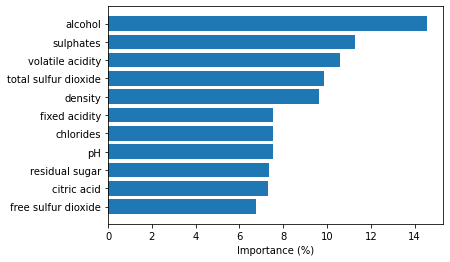

In [69]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.ticker as mtick

feature_imp = pd.Series(clf.feature_importances_, index=my_metrics).sort_values(ascending=True)

pyplot.barh(feature_imp.index, feature_imp.values*100)
pyplot.xlabel('Importance (%)')
pyplot.show()

Feature: 0, Score: 0.02499
Feature: 1, Score: -1.08359
Feature: 2, Score: -0.18256
Feature: 3, Score: 0.01633
Feature: 4, Score: -1.87423
Feature: 5, Score: 0.00436
Feature: 6, Score: -0.00326
Feature: 7, Score: -17.88116
Feature: 8, Score: -0.41365
Feature: 9, Score: 0.91633
Feature: 10, Score: 0.27620


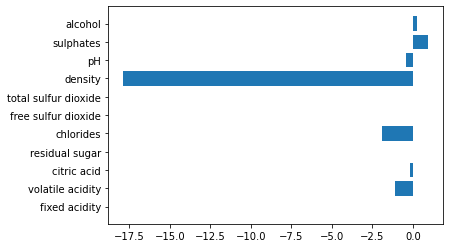

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=12, n_informative=4, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.barh(my_metrics, importance)
pyplot.show()